<a href="https://colab.research.google.com/github/Sagalo04/Fourier/blob/master/Fourier_filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/PDI/Ejemplos clase/'
os.chdir(path)
!pwd
# graficar imagenes estadisticas en el notebook

%matplotlib inline

/content/drive/My Drive/PDI/Ejemplos clase


In [0]:
def displayGray3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(20,20))
  plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayGray4(a,b,c,d,title1 = "Original", title2="Edited", title3="Edited",title4="Edited"):
  plt.figure(figsize=(20,20))
  plt.subplot(221), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(222), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(223), plt.imshow(c,cmap='gray'), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.subplot(224), plt.imshow(d,cmap='gray'), plt.title(title4)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayGray2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(15,15))
  plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(131), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def readRGB(imgPath):
  img=cv2.imread(imgPath)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

In [0]:
img = cv2.imread('A1.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum,'Input image','Magnitude Spectrum')

img = cv2.imread('A2.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum,'Input image','Magnitude Spectrum')

img = cv2.imread('K1.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum,'Input image','Magnitude Spectrum')

img = cv2.imread('K2.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum,'Input image','Magnitude Spectrum')

img = cv2.imread('S1.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum,'Input image','Magnitude Spectrum')

img = cv2.imread('S2.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

displayGray2(img,magnitude_spectrum,'Input image','Magnitude Spectrum')


In [0]:
img = cv2.imread('S1.png',0)
f=np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))
magnitude_spectrum_or=20*np.log(np.abs(f))

displayGray3(img,magnitude_spectrum,magnitude_spectrum_or)

# **Filtros https://claudiovz.github.io/scipy-lecture-notes-ES/advanced/image_processing/index.html**

# **Filtro pasa bajas**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


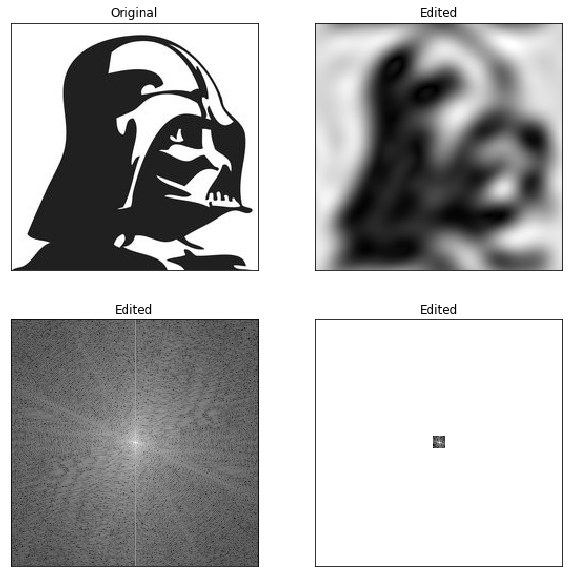

In [0]:
img = cv2.imread('dark.jpg',0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags= cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fils,cols = img.shape
centfils, centcols= fils/2,cols/2

#Creamos una cascara con un centro cuadrado de 1 y el resto zeros
mask=np.zeros((fils,cols,2), np.uint8)
mask[np.int32(centfils)-6:np.int32(centfils)+6, np.int32(centcols)-6:np.int32(centcols)+6]=1
#Aplicar la mascara y luego obtenemos la inveresa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))

f_ishift=np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

#displayGray2(img,img_back)
#displayGray2(magnitude_spectrum,fshift_mask_mag)

displayGray4(img,img_back,magnitude_spectrum,fshift_mask_mag)
  
  

# **Filtro pasa altas**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


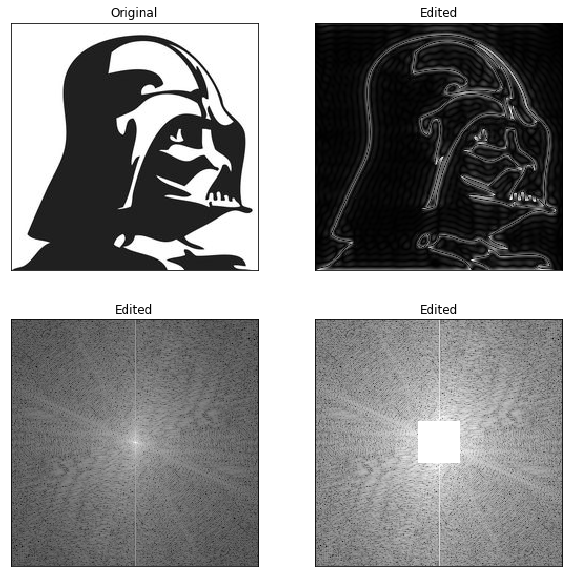

In [0]:
img = cv2.imread('dark.jpg',0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags= cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fils,cols = img.shape
centfils, centcols= fils/2,cols/2

#Creamos una cascara con un centro cuadrado de 1 y el resto zeros
mask=np.ones((fils,cols,2), np.uint8)
mask[np.int32(centfils)-20:np.int32(centfils)+20, np.int32(centcols)-20:np.int32(centcols)+20]=0

#Aplicar la mascara y luego obtenemos la inveresa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))

f_ishift=np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

#displayGray2(img,img_back)
#displayGray2(magnitude_spectrum,fshift_mask_mag)

displayGray4(img,img_back,magnitude_spectrum,fshift_mask_mag)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


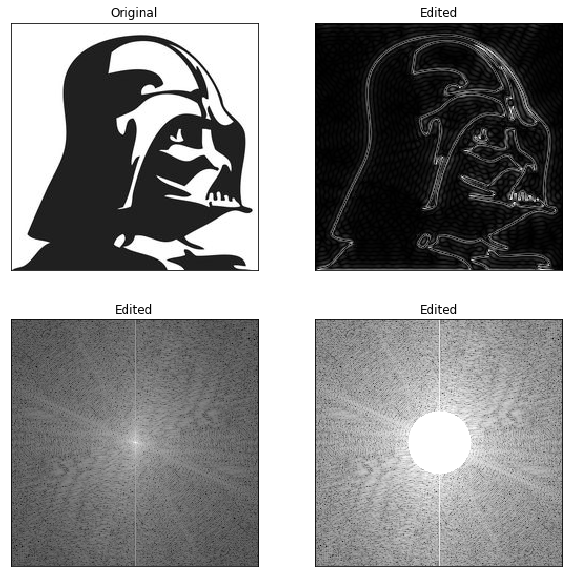

In [0]:
img = cv2.imread('dark.jpg', 0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
fils, cols = img.shape
centfils, centcols = fils/2, cols/2

#creemos unas mascara con un centro cuadrado de 1 y el resto zeros
mask = np.ones((fils, cols, 2), np.uint8)
r = 30
center = [centfils, centcols]
x, y = np.ogrid[:fils, :cols]

mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
mask[mask_area] = 0

##Aplicquemos la mascara y luego obtenemos la inversa de DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000* np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))

f_shift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_shift)
img_back = cv2.magnitude(img_back[:,:,1], img_back[:,:,0])

displayGray4(img, img_back,magnitude_spectrum, fshift_mask_mag)

In [0]:
img = cv2.imread('nasa.png', 0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
fils, cols = img.shape
centfils, centcols = fils/2, cols/2

#Creamos una cascara con un centro cuadrado de 1 y el resto zeros
mask=np.zeros((fils,cols,2), np.uint8)
mask[np.int32(centfils)-50:np.int32(centfils)+50, np.int32(centcols)-50:np.int32(centcols)+50]=1

#Aplicar la mascara y luego obtenemos la inveresa DFT
fshift = dft_shift*mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))

f_ishift=np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
img_flotante = np.float32(img_back)
dft = cv2.dft(img_flotante, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
magnitude_spectrum1 = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

#displayGray2(img,img_back)
#displayGray2(magnitude_spectrum,fshift_mask_mag)

displayGray4(img,img_back,magnitude_spectrum,magnitude_spectrum1)

# **Median Filter**

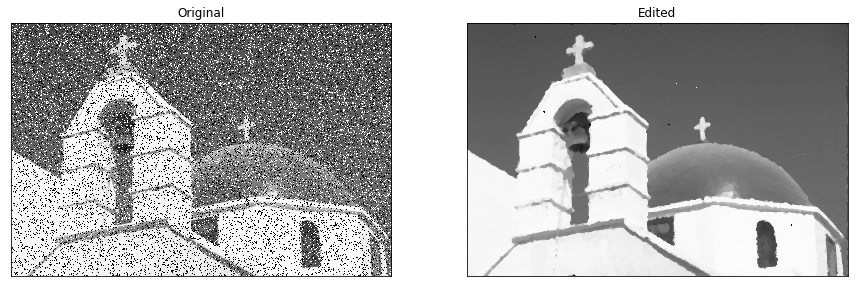

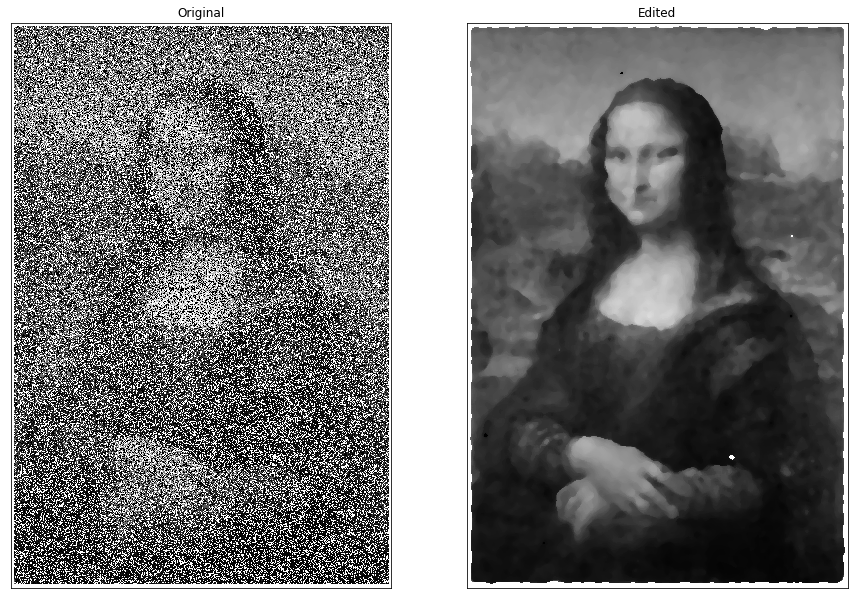

In [0]:
#read image
img = cv2.imread('saltlgle.png', 0)
#apply th 3x3 median filter on the page
median = cv2.medianBlur(img, 3)
median = cv2.medianBlur(median, 3)

#display

displayGray2(img,median)

#read image
img = cv2.imread('saltpepper.png', 0)
#apply th 3x3 median filter on the page
median = cv2.medianBlur(img, 7)
median = cv2.medianBlur(median, 5)

#display

displayGray2(img,median)

# **Sharpened filter**

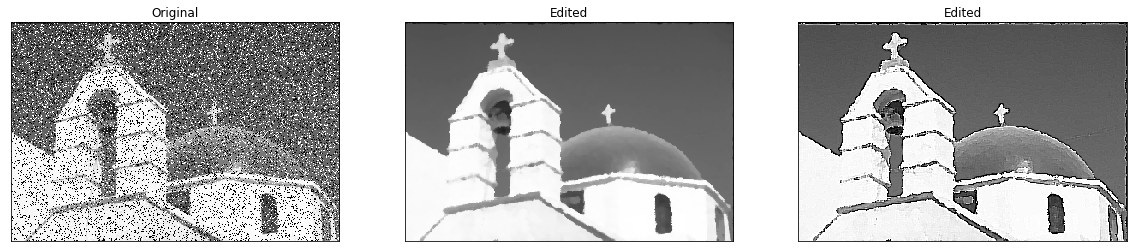

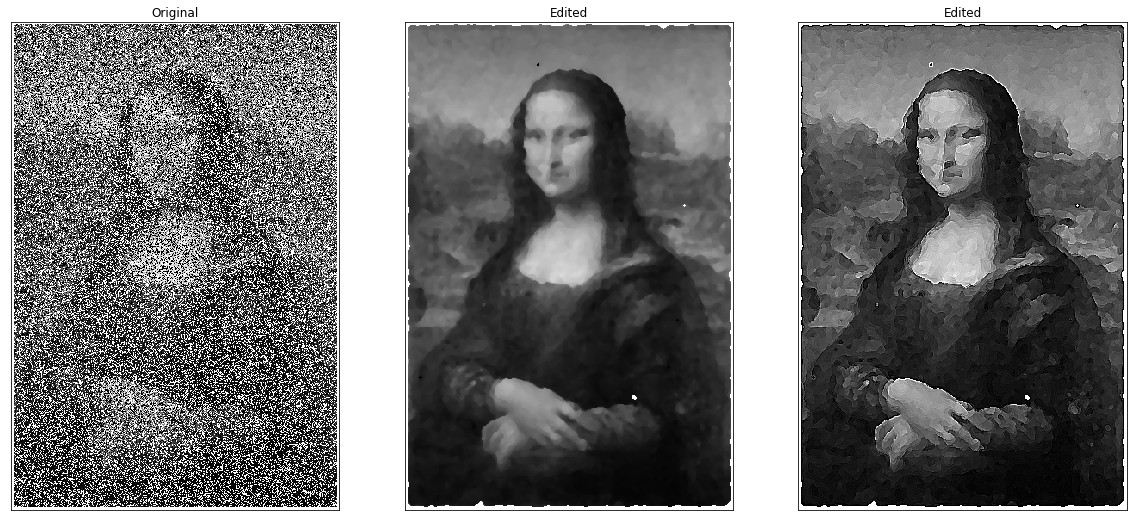

In [0]:
#read image
img = cv2.imread('saltlgle.png', 0)
#apply th 3x3 median filter on the page
median = cv2.medianBlur(img, 5)
#median = cv2.medianBlur(median, 5)

#Create our sharpening kernel

kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

#applying the sharpening kernel to the input image & displaying it
sharpened1 = cv2.filter2D(median, -1, kernel_sharpening)


displayGray3(img,median,sharpened1)

#read image
img = cv2.imread('saltpepper.png', 0)
#apply th 3x3 median filter on the page
median = cv2.medianBlur(img, 5)
median = cv2.medianBlur(median, 5)
median = cv2.medianBlur(median, 5)
median = cv2.medianBlur(median, 3)

#Create our sharpening kernel

kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

#applying the sharpening kernel to the input image & displaying it
sharpened = cv2.filter2D(median, -1, kernel_sharpening)


displayGray3(img,median,sharpened)

# **Bilateral Filter**

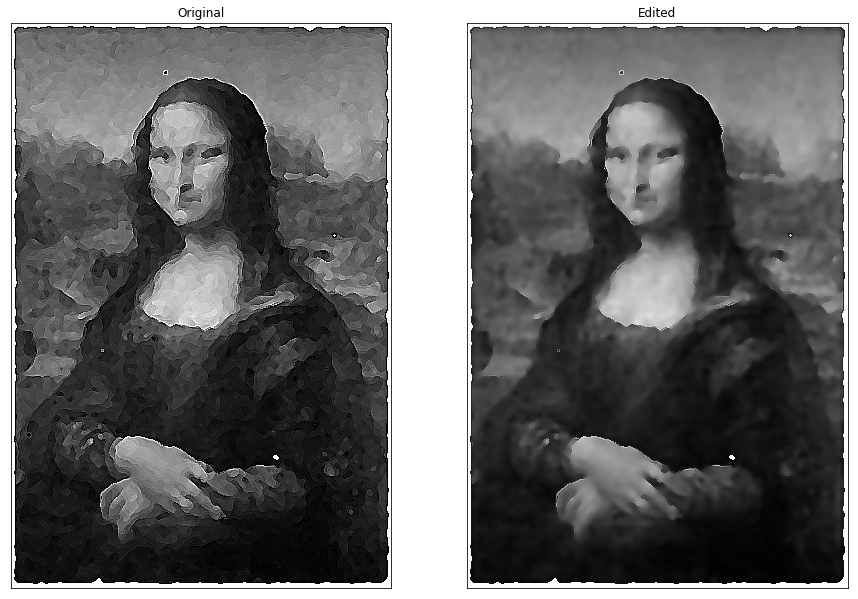

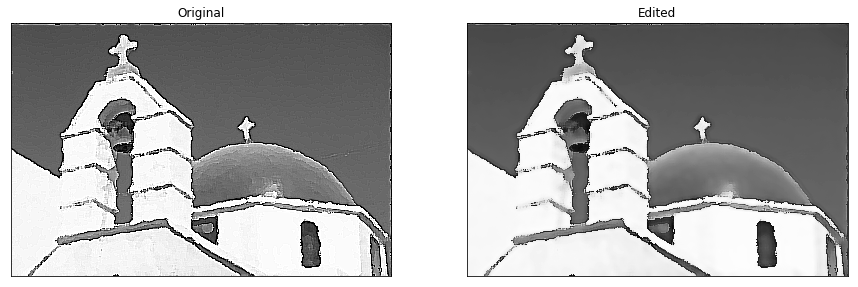

In [163]:
bilateral = cv2.bilateralFilter(sharpened,9,75,75)

displayGray2(sharpened,bilateral)

bilateral = cv2.bilateralFilter(sharpened1,9,75,75)

displayGray2(sharpened1,bilateral)

# **Laplacian**

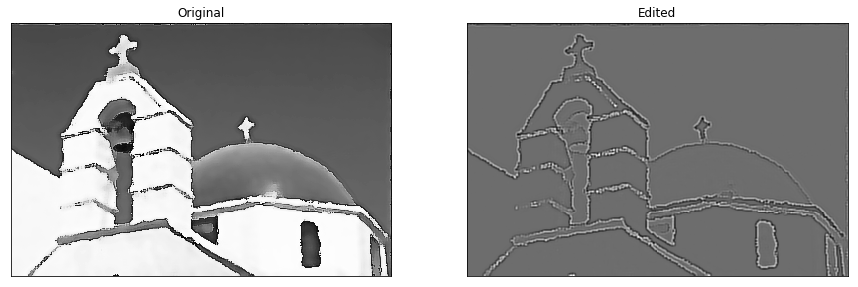

In [166]:
#img = cv2.imread(bilateral,0)

lapl = cv2.Laplacian(bilateral,cv2.CV_64F,ksize=5)

displayGray2(bilateral,lapl)

In [0]:
#Create our laplacian kernel

kernel_laplacian = np.array([[0,1,0],
                             [1,-4,1],
                             [0,1,0]])

#applying the laplacian kernel to the input image & displaying it
lap1 = cv2.filter2D(sharpened1, -1, kernel_laplacian)


displayGray2(sharpened1,lap1)

#Create our laplacian kernel

kernel_laplacian = np.array([[0,-1,0],
                             [-1,4,-1],
                             [0,-1,0]])

#applying the laplacian kernel to the input image & displaying it
lap2 = cv2.filter2D(sharpened1, -1, kernel_laplacian)


displayGray2(sharpened1,lap2)

#Create our laplacian kernel

kernel_laplacian = np.array([[-1,-1,-1],
                             [-1,8,-1],
                             [-1,-1,-1]])

#applying the laplacian kernel to the input image & displaying it
lap3 = cv2.filter2D(sharpened1, -1, kernel_laplacian)


displayGray2(sharpened1,lap3)

#Create our laplacian kernel

kernel_laplacian = np.array([[1,1,1],
                             [1,-8,1],
                             [1,1,1]])

#applying the laplacian kernel to the input image & displaying it
lap4 = cv2.filter2D(sharpened1, -1, kernel_laplacian)


displayGray2(sharpened1,lap4)

kernel_laplacian = np.array([[1,0,-1],
                             [2,0,-2],
                             [1,0,-1]])

#applying the laplacian kernel to the input image & displaying it
lap5 = cv2.filter2D(sharpened1, -1, kernel_laplacian)


displayGray2(sharpened1,lap5)

kernel_laplacian = np.array([[1,2,1],
                             [0,0,0],
                             [-1,-2,-1]])

#applying the laplacian kernel to the input image & displaying it
lap6 = cv2.filter2D(sharpened1, -1, kernel_laplacian)


displayGray2(sharpened1,lap6)


lapf = lap1+lap2+lap3+lap4+lap5+lap6
displayGray2(sharpened1,lapf)



# **Derivative filters**

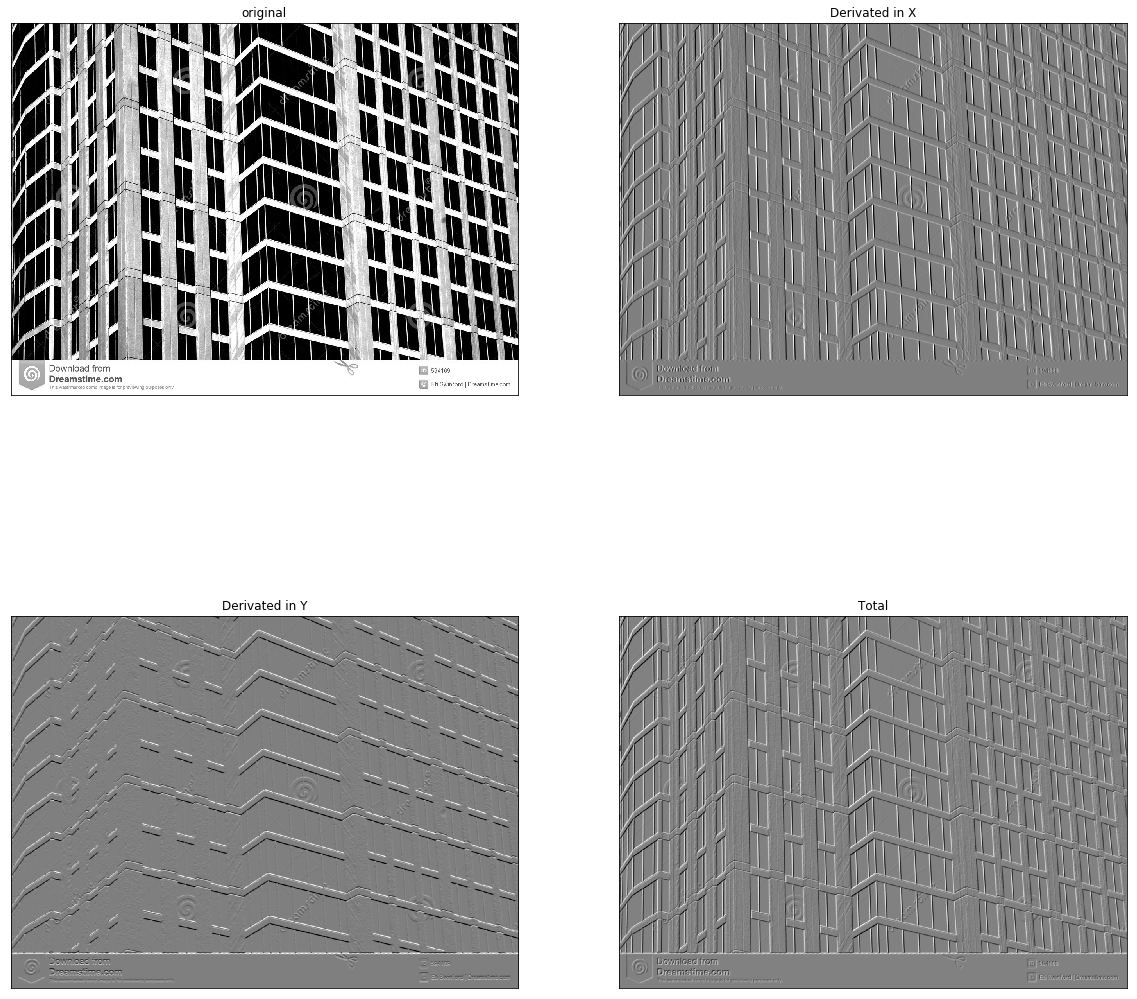

In [182]:
img = cv2.imread('edif.jpg', 0)
x_sobel = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
y_sobel = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
sobel = x_sobel + y_sobel

displayGray4(img,x_sobel,y_sobel,sobel,'original','Derivated in X','Derivated in Y','Total')


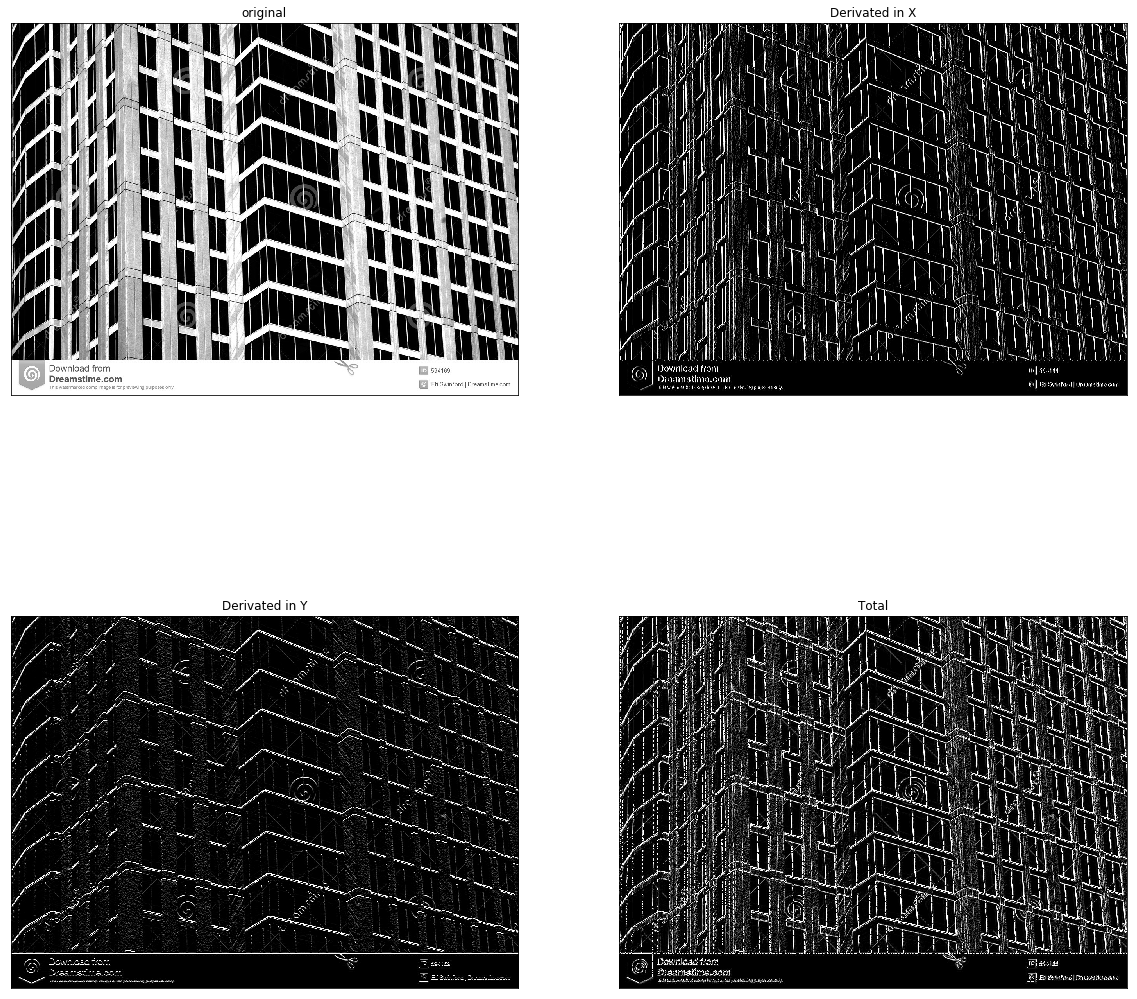

In [184]:
img = cv2.imread('edif.jpg', 0)


kernel_sobelx = np.array([[-1,0,1],
                             [-2,0,2],
                             [-1,0,1]])

x_sobel = cv2.filter2D(img, -1, kernel_sobelx)

kernel_sobely = np.array([[-1,-2,-1],
                             [0,0,0],
                             [1,2,1]])

y_sobel = cv2.filter2D(img, -1, kernel_sobely)


sobel = x_sobel+y_sobel

displayGray4(img,x_sobel,y_sobel,sobel,'original','Derivated in X','Derivated in Y','Total')
